# HW4

# Student Name: Hung Yi-Le

# USC ID: 3941176047

# GITHUB: ZackLa

In [1]:
import pandas as pd
import numpy as np
import statistics #for question a (iii)
from scipy.stats import norm # for question a (iii)
from scipy.stats import bootstrap # for question a (iii)
import seaborn as sns 
import math
import os
import glob
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from sklearn.preprocessing import label_binarize

In [2]:
d2 = pd.DataFrame()
d3 = pd.DataFrame()
d6 = pd.DataFrame()
d7 = pd.DataFrame()

test_set = pd.DataFrame()
train_set = pd.DataFrame()
list_1 = []

# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.
# (c) Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
## i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc). min, max, mean, median, standard error, absolute error, skewness, kurtosis
## ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly. where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.


In [3]:
for i in range(7):
    if  i <= 1: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/bending1/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Bending"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2, d1], ignore_index = True)
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/bending1/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
                sq = 0
                d4 = pd.DataFrame()
                d4 = d1.iloc[:,k+1].describe()
                d4 = d4.drop(index = 'count').values.tolist()
                d5 = pd.DataFrame(d4)
                d5 = d5.T
                d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                         sq+6: 'max' + '(' + str(k+1) + ')',
                                         sq: 'mean' + '(' + str(k+1) + ')',
                                         sq+4: 'median' + '(' + str(k+1) + ')',
                                         sq+1: 'std' + '(' +str(k+1) + ')',
                                         sq+3: '1st quart' + '(' + str(k+1) + ')',
                                         sq+5: '3rd quart' + '(' + str(k+1) + ')'})
                d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Bending"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)

In [4]:
for i in range(6):
    if  i <= 1:
        d1 = pd.read_csv('../data/bending2/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Bending"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:
        d1 = pd.read_csv('../data/bending2/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Bending"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)


In [5]:
for i in range(15):
    if  i <= 2:
        d1 = pd.read_csv('../data/cycling/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Cycling"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:
        d1 = pd.read_csv('../data/cycling/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Cycling"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)

In [6]:
for i in range(15):
    if  i <= 2:
        d1 = pd.read_csv('../data/lying/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Lying"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:
        d1 = pd.read_csv('../data/lying/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Lying"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)

In [7]:
for i in range(15):
    if  i <= 2:## this read the first 3 files, which are test set
        d1 = pd.read_csv('../data/walking/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Walking"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:## this read the others files which are train set
        d1 = pd.read_csv('../data/walking/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Walking"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)


In [8]:
for i in range(15):
    if  i <= 2:
        d1 = pd.read_csv('../data/standing/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Standing"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:
        d1 = pd.read_csv('../data/standing/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Standing"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)

In [9]:
for i in range(15):
    if  i <= 2:
        d1 = pd.read_csv('../data/sitting/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Sitting"
        d7 = pd.concat([d7, d6])
        test_set = pd.concat([test_set,d6])
        d2 = pd.concat([d2,d1], ignore_index = True)
    else:
        d1 = pd.read_csv('../data/sitting/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        d6 = pd.DataFrame()
        for k in range(6):
            sq = 0
            d4 = pd.DataFrame()
            d4 = d1.iloc[:,k+1].describe()
            d4 = d4.drop(index = 'count').values.tolist()
            d5 = pd.DataFrame(d4)
            d5 = d5.T
            d5 = d5.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            d6 = pd.concat([d6, d5], axis = 1)
        d6['Class'] = "Sitting"
        d7 = pd.concat([d7, d6])
        train_set = pd.concat([train_set, d6])
        d3 = pd.concat([d3,d1], ignore_index = True)


In [10]:
d7.index = range(1,89,1)
test_set.index = range(1,20,1)
train_set.index = range(1,70,1)

In [11]:
column_names = ['min(1)','max(1)','mean(1)','median(1)','std(1)','1st quart(1)','3rd quart(1)',
           'min(2)','max(2)','mean(2)','median(2)','std(2)','1st quart(2)','3rd quart(2)',
           'min(3)','max(3)','mean(3)','median(3)','std(3)','1st quart(3)','3rd quart(3)',
           'min(4)','max(4)','mean(4)','median(4)','std(4)','1st quart(4)','3rd quart(4)',
           'min(5)','max(5)','mean(5)','median(5)','std(5)','1st quart(5)','3rd quart(5)',
           'min(6)','max(6)','mean(6)','median(6)','std(6)','1st quart(6)','3rd quart(6)','Class']

In [12]:
d7

,mean(1),std(1),min(1),1st quart(1),median(1),3rd quart(1),max(1),mean(2),std(2),min(2),...,3rd quart(5),max(5),mean(6),std(6),min(6),1st quart(6),median(6),3rd quart(6),max(6),Class
1,40.624792,1.476967,37.25,39.25,40.50,42.00,45.00,0.358604,0.322605,0.0,...,36.00,38.25,0.570583,0.582915,0.0,0.00,0.43,1.30,1.92,Bending
2,42.812812,1.435550,38.00,42.00,42.50,43.67,45.67,0.372438,0.289158,0.0,...,34.50,38.50,0.571083,0.601010,0.0,0.00,0.43,1.30,3.11,Bending
3,43.954500,1.558835,35.00,43.00,44.33,45.00,47.40,0.426250,0.338690,0.0,...,36.50,38.50,0.493292,0.513506,0.0,0.00,0.43,0.94,1.79,Bending
4,42.179813,3.670666,33.00,39.15,43.50,45.00,47.75,0.696042,0.630860,0.0,...,36.33,38.67,0.613521,0.524317,0.0,0.00,0.50,1.00,2.18,Bending
5,41.678063,2.243490,33.00,41.33,41.75,42.75,45.75,0.535979,0.405469,0.0,...,31.25,37.50,0.383292,0.389164,0.0,0.00,0.43,0.50,1.79,Bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,43.884833,3.198894,28.50,42.00,45.25,46.50,48.25,0.517354,0.394064,0.0,...,19.25,25.00,1.354917,1.150883,0.0,0.50,1.09,1.70,7.00,Sitting
85,42.111583,1.122245,39.50,41.50,42.00,42.00,45.00,0.341938,0.295805,0.0,...,17.25,23.00,0.961167,0.882784,0.0,0.47,0.82,1.22,6.36,Sitting
86,42.282667,1.356149,39.67,41.50,41.50,44.33,44.75,0.498354,0.147984,0.0,...,18.25,23.25,0.869000,0.794213,0.0,0.47,0.82,1.00,7.85,Sitting
87,42.360187,1.017372,40.00,41.50,42.00,43.25,44.67,0.482500,0.246389,0.0,...,22.00,26.67,0.719813,0.608546,0.0,0.43,0.50,0.83,4.64,Sitting


In [13]:
d7 = d7.reindex(columns = column_names)
test_set = test_set.reindex(columns = column_names)
train_set = train_set.reindex(columns = column_names)

In [14]:
d8 = d7.copy()

In [15]:
d7 = d7.drop(['Class'], axis = 1)

### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [16]:
d13 = pd.DataFrame()
d12 = []
z = 0
p = 0

In [17]:
for i, k in enumerate(d7.columns):
    if z <= 6:
        d11 = round(statistics.stdev(d7.iloc[:,i]),3)
        d12.append(d11)
        z += 1
        if i == 41:
            p += 1
            d12 = pd.DataFrame(d12)
            d12 = d12.T
            d13 = pd.concat([d13, d12], axis = 1)
            d13 = d13.rename(columns = {z - 7: 'min' + '(' + str(p) + ')',
                                        z - 6: 'max' + '(' + str(p) + ')',
                                         z - 5: 'mean' + '(' + str(p) + ')',
                                         z - 4: 'median' + '(' + str(p) + ')',
                                         z - 3 : 'std' + '(' +str(p) + ')',
                                         z - 2: '1st quart' + '(' + str(p) + ')',
                                         z - 1: '3rd quart' + '(' + str(p) + ')'})
    else:
        p += 1
        d12 = pd.DataFrame(d12)
        d12 = d12.T
        d13 = pd.concat([d13, d12], axis = 1)
        d13 = d13.rename(columns = {z - 7: 'min' + '(' + str(p) + ')',
                                    z - 6: 'max' + '(' + str(p) + ')',
                                     z - 5: 'mean' + '(' + str(p) + ')',
                                     z - 4: 'median' + '(' + str(p) + ')',
                                     z - 3: 'std' + '(' +str(p) + ')',
                                     z - 2: '1st quart' + '(' + str(p) + ')',
                                     z - 1: '3rd quart' + '(' + str(p) + ')'})
        z = 0
        d12 = []
        d11 = round(statistics.stdev(d7.iloc[:,i]),3)
        d12.append(d11)
        z += 1

In [18]:
#Rename index name
d13.index = ['Std_Estimate']

In [19]:
d13 = d13.reindex(columns = column_names)

In [20]:
d13

,min(1),max(1),mean(1),median(1),std(1),1st quart(1),3rd quart(1),min(2),max(2),mean(2),...,1st quart(5),3rd quart(5),min(6),max(6),mean(6),median(6),std(6),1st quart(6),3rd quart(6),Class
Std_Estimate,9.57,4.394,5.336,5.44,1.772,6.154,5.139,0.0,5.063,1.574,...,6.096,5.532,0.046,2.519,1.155,1.086,0.518,0.759,1.524,NaN


In [21]:
d7

,min(1),max(1),mean(1),median(1),std(1),1st quart(1),3rd quart(1),min(2),max(2),mean(2),...,std(5),1st quart(5),3rd quart(5),min(6),max(6),mean(6),median(6),std(6),1st quart(6),3rd quart(6)
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.43,0.601010,0.00,1.30
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94
4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,28.50,48.25,43.884833,45.25,3.198894,42.00,46.50,0.0,3.28,0.517354,...,5.258598,10.5000,19.25,0.0,7.00,1.354917,1.09,1.150883,0.50,1.70
85,39.50,45.00,42.111583,42.00,1.122245,41.50,42.00,0.0,1.09,0.341938,...,4.847545,9.0000,17.25,0.0,6.36,0.961167,0.82,0.882784,0.47,1.22
86,39.67,44.75,42.282667,41.50,1.356149,41.50,44.33,0.0,1.00,0.498354,...,6.039797,8.5000,18.25,0.0,7.85,0.869000,0.82,0.794213,0.47,1.00
87,40.00,44.67,42.360187,42.00,1.017372,41.50,43.25,0.0,1.00,0.482500,...,6.466786,9.7500,22.00,0.0,4.64,0.719813,0.50,0.608546,0.43,0.83


In [22]:
d22 = pd.DataFrame()
for i, k in enumerate(d7.columns):
    data = (np.array(d7.iloc[:,i]),)
    res = bootstrap(data, np.std, confidence_level = 0.9, random_state = 42, method = 'percentile')
    d21 = pd.DataFrame(res.confidence_interval)
    d21.columns = [d7.columns[i]]
    d22 = pd.concat([d22, d21], axis = 1) 

In [23]:
d22.index = ['low', 'high']

In [24]:
d22 = pd.concat([d13.T, d22.T], axis = 1)

# iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

### intead of 1 and 3 quart, I will pick min and max, becasue not only it give me the min and max, it also gives me their range, which I think it is good. The last important time-domain feature I think will be mean, because its the cetner of each feature, where in some cases it is important!

# 2. ISLR 3.7.4

# I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X^2 + β3X^3 + ϵ.

# (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

## In this case, generally cubic regression would be better than the simple linear regression model, since its more flexibility/ adding more features to the model, that mean we are reducing the RSS.

# (b) Answer (a) using test rather than training RSS.

### With a simple lienar regression, it's less flexiable and low variance compares to cubic regression. therefore it's goign to have a lowr RSS.

# (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

### Same to the question a. Cubic regression would have have lower RSS due to the same reason

# (d) Answer (c) using test rather than training RSS.

### Since the truen relationship between X and Y is not linear, which mean we can't tell how far it is to the linear. we know cubic regression has higher variance than linear regression, but that doesn't tell us anything. I think we need more information about data in order for us to come up with a precise conclusion.

# 2. Time Series Classification Part 2: Binary and Multiclass Classification

# (a) Binary Classification Using Logistic Regression3

### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [25]:
list2 = [1,2,6]

In [26]:
d31 = pd.DataFrame()

In [27]:
for i, k in enumerate(list2):
    d31 = pd.concat([d31, d8.loc[:,'min' + '(' + str(k) + ')']], axis = 1)
    d31 = pd.concat([d31, d8.loc[:,'max' + '(' + str(k) + ')']], axis = 1)
    d31 = pd.concat([d31, d8.loc[:,'mean' + '(' + str(k) + ')']], axis = 1)

In [28]:
d31 = pd.concat([d31, d8.loc[:,'Class']], axis = 1)

In [29]:
d31

,min(1),max(1),mean(1),min(2),max(2),mean(2),min(6),max(6),mean(6),Class
1,37.25,45.00,40.624792,0.0,1.30,0.358604,0.0,1.92,0.570583,Bending
2,38.00,45.67,42.812812,0.0,1.22,0.372438,0.0,3.11,0.571083,Bending
3,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,Bending
4,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,Bending
5,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,Bending
...,...,...,...,...,...,...,...,...,...,...
84,28.50,48.25,43.884833,0.0,3.28,0.517354,0.0,7.00,1.354917,Sitting
85,39.50,45.00,42.111583,0.0,1.09,0.341938,0.0,6.36,0.961167,Sitting
86,39.67,44.75,42.282667,0.0,1.00,0.498354,0.0,7.85,0.869000,Sitting
87,40.00,44.67,42.360187,0.0,1.00,0.482500,0.0,4.64,0.719813,Sitting


In [30]:
d32 = d31.copy()

In [31]:
d32.loc[d31["Class"] != "Bending", "Class"] = "Non-Bending"

In [32]:
d32

,min(1),max(1),mean(1),min(2),max(2),mean(2),min(6),max(6),mean(6),Class
1,37.25,45.00,40.624792,0.0,1.30,0.358604,0.0,1.92,0.570583,Bending
2,38.00,45.67,42.812812,0.0,1.22,0.372438,0.0,3.11,0.571083,Bending
3,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,Bending
4,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,Bending
5,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,Bending
...,...,...,...,...,...,...,...,...,...,...
84,28.50,48.25,43.884833,0.0,3.28,0.517354,0.0,7.00,1.354917,Non-Bending
85,39.50,45.00,42.111583,0.0,1.09,0.341938,0.0,6.36,0.961167,Non-Bending
86,39.67,44.75,42.282667,0.0,1.00,0.498354,0.0,7.85,0.869000,Non-Bending
87,40.00,44.67,42.360187,0.0,1.00,0.482500,0.0,4.64,0.719813,Non-Bending


/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


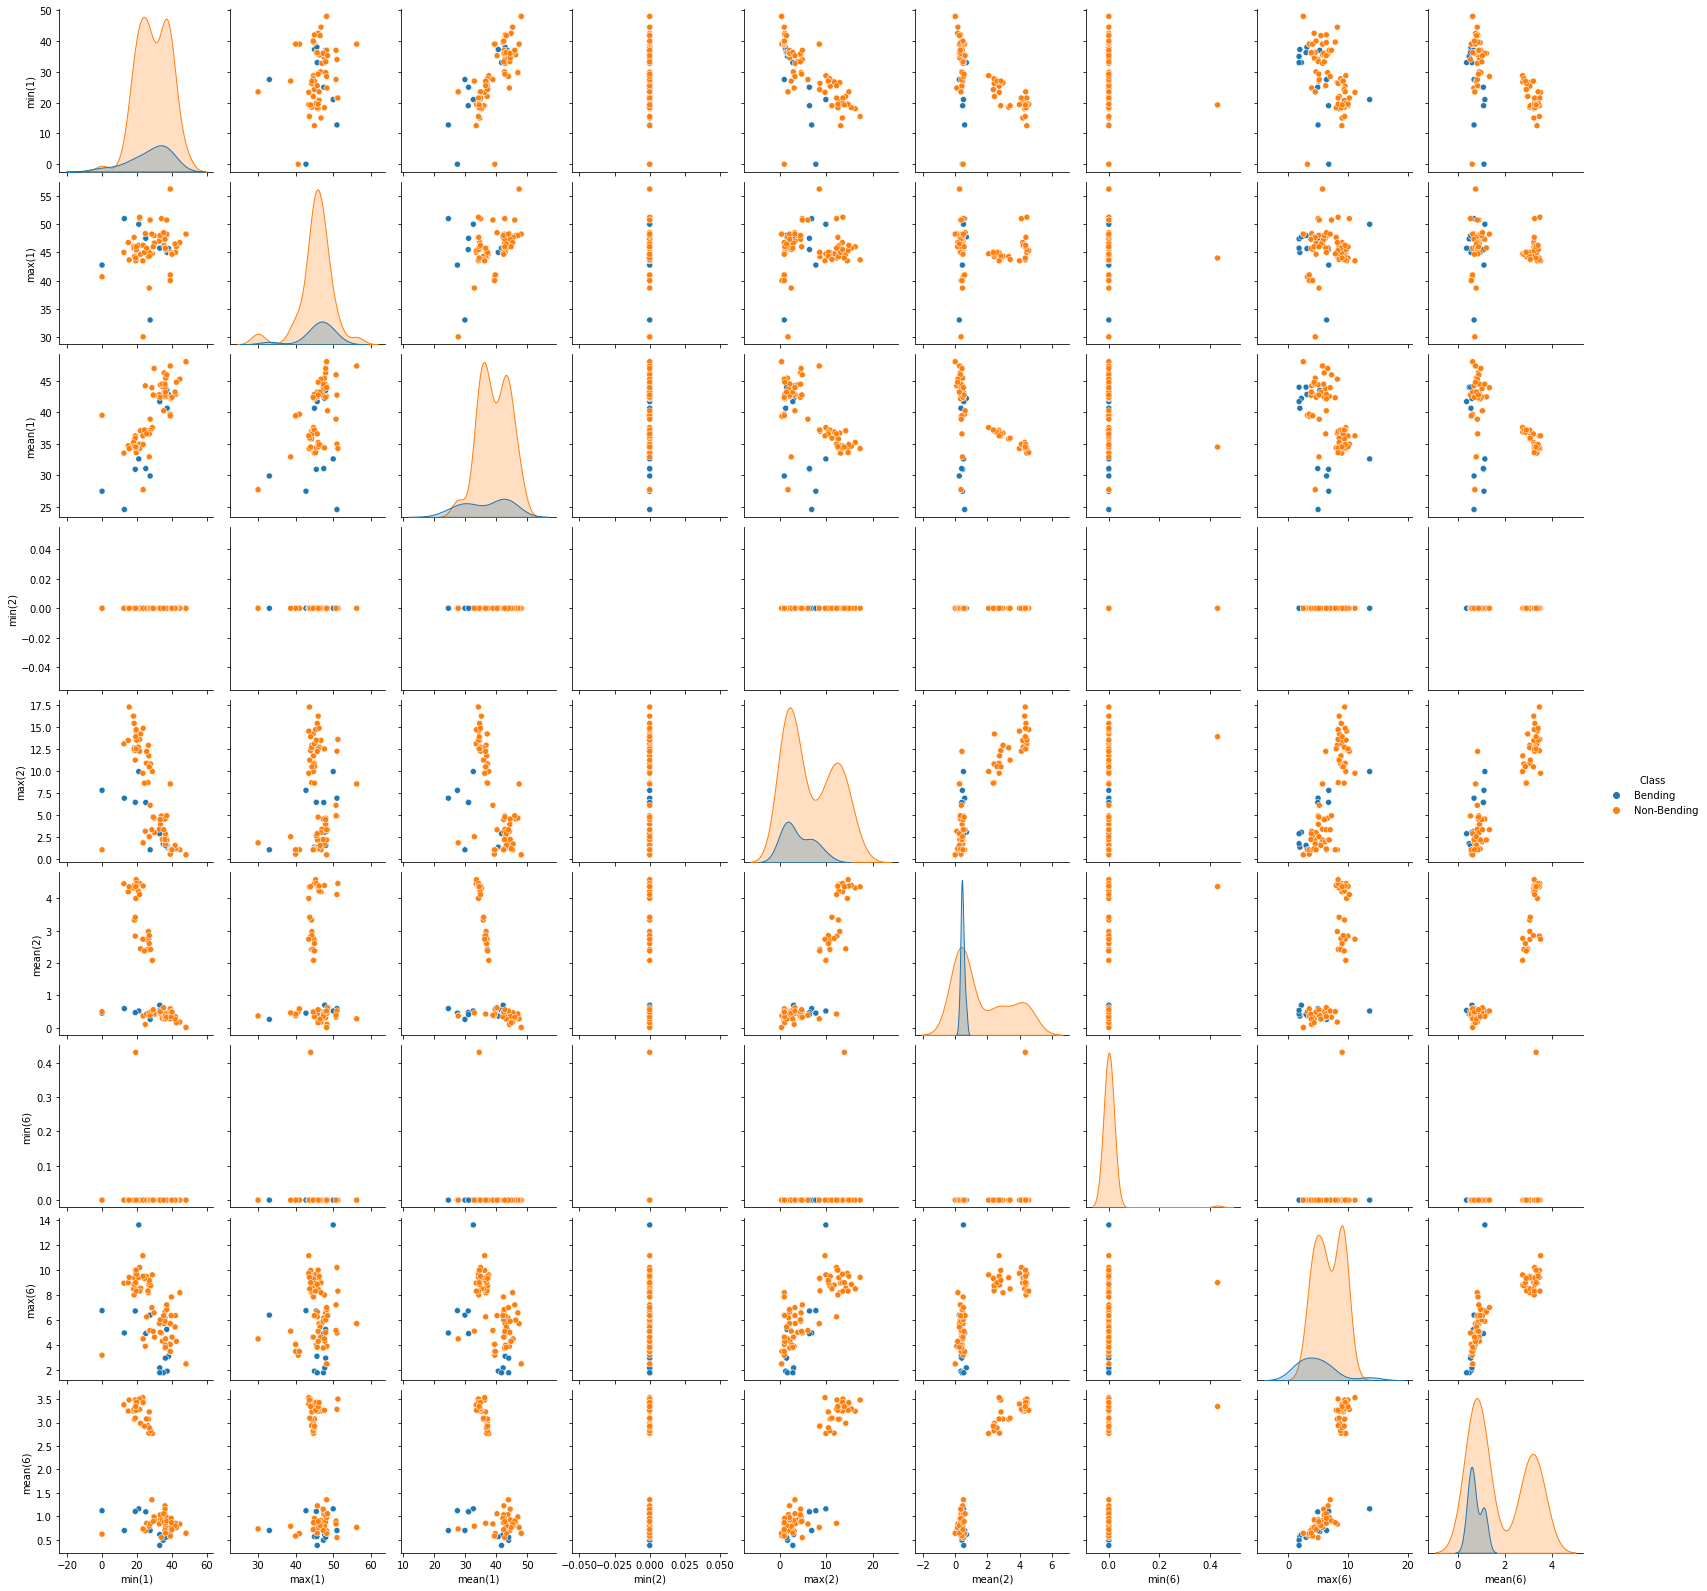

In [33]:
sns.pairplot(d32, hue = "Class")

### The scatter plot of features I specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance is shown as above


# ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?


In [34]:
d31_0 = pd.DataFrame()
test_set_1 = pd.DataFrame()
train_set_1 = pd.DataFrame()

In [35]:
for i in range(7):
    if  i <= 1: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/bending1/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            ## putting them in the right order
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            
            d31_7 = d31_7.reindex(columns = column_names1)
            
            #putting data in horizontal way
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Bending"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/bending1/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Bending"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [36]:
for i in range(6):
    if  i <= 1: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/bending2/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Bending"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/bending2/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Bending"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [37]:
for i in range(15):
    if  i <= 2: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/cycling/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Cycling"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/cycling/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Cycling"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [38]:
for i in range(15):
    if  i <= 2: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/lying/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Lying"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/lying/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Lying"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [39]:
for i in range(15):
    if  i <= 2: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/walking/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Walking"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/walking/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Walking"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [40]:
for i in range(15):
    if  i <= 2: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/standing/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Standing"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/standing/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Standing"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])


In [41]:
for i in range(15):
    if  i <= 2: ## this read the first 2 files, which are test set
        d1 = pd.read_csv('../data/sitting/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')']
            d31_7 = d31_7.reindex(columns = column_names1)
            
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2']
            d31_7 = d31_7.reindex(columns = column_names1)
            

            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)

        d31_4['Class'] = "Sitting"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        test_set_1 = pd.concat([test_set_1, d31_4])
        
    else: ## this read the others files which are train set
        d1 = pd.read_csv('../data/sitting/dataset'+ str(i+1)+ '.csv',  skiprows = 4)
        
        d31_2 = d1.iloc[0:240]
        d31_3 = d1.iloc[240:480]
        
        d31_4 = pd.DataFrame()
        d32_1 = pd.DataFrame()

        for k in range(6):
            sq = 0

            d31_5 = d31_2.iloc[:,k+1].describe() #The first 240 data
            d31_5 = d31_5.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_5)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')',
                                     sq+6: 'max' + '(' + str(k+1) + ')',
                                     sq: 'mean' + '(' + str(k+1) + ')',
                                     sq+4: 'median' + '(' + str(k+1) + ')',
                                     sq+1: 'std' + '(' +str(k+1) + ')',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')'})
            
            column_names1 = ['min('+str(k+1)+')','max('+str(k+1)+')','mean('+str(k+1)+')',
                             'median('+str(k+1)+')','std('+str(k+1)+')','1st quart('+str(k+1)+')',
                             '3rd quart('+str(k+1)+')'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d31_4 = pd.concat([d31_4, d31_7], axis = 1)
            
            
            d31_6 = d31_3.iloc[:,k+1].describe() #The second 240 data
            d31_6 = d31_6.drop(index = 'count').values.tolist()
            d31_7 = pd.DataFrame(d31_6)
            d31_7 = d31_7.T
            d31_7 = d31_7.rename(columns = {sq+2 : 'min' + '(' + str(k+1) + ')_2',
                                     sq+6: 'max' + '(' + str(k+1) + ')_2',
                                     sq: 'mean' + '(' + str(k+1) + ')_2',
                                     sq+4: 'median' + '(' + str(k+1) + ')_2',
                                     sq+1: 'std' + '(' +str(k+1) + ')_2',
                                     sq+3: '1st quart' + '(' + str(k+1) + ')_2',
                                     sq+5: '3rd quart' + '(' + str(k+1) + ')_2'})
            
            column_names1 = ['min('+str(k+1)+')_2','max('+str(k+1)+')_2','mean('+str(k+1)+')_2',
                             'median('+str(k+1)+')_2','std('+str(k+1)+')_2','1st quart('+str(k+1)+')_2',
                             '3rd quart('+str(k+1)+')_2'] #reorder columns
            d31_7 = d31_7.reindex(columns = column_names1)
            
            d32_1 = pd.concat([d32_1, d31_7], axis = 1)


        d31_4['Class'] = "Sitting"
        a = 1
        for i, z in enumerate(d32_1.columns):
            d31_4.insert(a, z, d32_1.iloc[:,i].tolist())
            a += 2
            
        d31_0 = pd.concat([d31_0, d31_4])
        train_set_1 = pd.concat([train_set_1, d31_4])

In [42]:
d31_0.index = range(1,89,1)
test_set_1.index = range(1,20,1)
train_set_1.index = range(1,70,1)

In [43]:
train_set_1

,min(1),min(1)_2,max(1),max(1)_2,mean(1),mean(1)_2,median(1),median(1)_2,std(1),std(1)_2,...,mean(6)_2,median(6),median(6)_2,std(6),std(6)_2,1st quart(6),1st quart(6)_2,3rd quart(6),3rd quart(6)_2,Class
1,36.50,35.00,46.50,47.40,44.057167,43.851833,44.50,43.50,1.556971,1.557168,...,0.388333,0.500,0.000,0.526656,0.478528,0.00,0.0000,1.000,0.71,Bending
2,33.75,33.00,47.75,46.00,43.278875,41.080750,45.00,42.00,3.473355,3.537481,...,0.586083,0.765,0.470,0.554542,0.491873,0.00,0.0000,1.220,0.87,Bending
3,33.00,39.25,45.75,43.67,41.621208,41.734917,42.33,41.50,3.118644,0.595920,...,0.347500,0.430,0.430,0.411200,0.363144,0.00,0.0000,0.710,0.50,Bending
4,39.00,37.00,48.00,46.50,44.117042,42.792875,45.00,42.67,1.359836,1.058792,...,0.543875,0.710,0.500,0.718016,0.473445,0.43,0.4300,1.120,0.71,Bending
5,36.67,36.25,45.00,48.00,43.486208,44.452042,43.71,44.50,1.281976,1.771251,...,0.585750,0.470,0.500,0.486847,0.487918,0.00,0.4225,0.830,0.83,Bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,36.25,28.50,47.33,48.25,45.315000,42.454667,45.75,42.25,2.205981,3.396238,...,1.367833,1.045,1.120,1.206909,1.094368,0.50,0.5000,1.625,1.79,Sitting
66,40.33,39.50,44.67,45.00,42.031833,42.191333,42.00,41.50,0.760260,1.390456,...,0.859542,0.820,0.755,1.017607,0.711063,0.47,0.4300,1.250,1.12,Sitting
67,39.67,41.00,42.00,44.75,41.494917,43.070417,41.50,44.33,0.343763,1.523650,...,0.739708,0.820,0.765,0.961261,0.553706,0.47,0.4300,1.120,1.00,Sitting
68,40.00,40.75,42.00,44.67,41.587625,43.132750,41.50,43.25,0.339056,0.872216,...,0.641583,0.710,0.500,0.542871,0.659703,0.47,0.4300,1.000,0.83,Sitting


In [44]:
d33 = pd.DataFrame()

In [45]:
for i, k in enumerate(list2):
    d33 = pd.concat([d33, train_set_1.loc[:,'min' + '(' + str(k) + ')']], axis = 1)
    d33 = pd.concat([d33, train_set_1.loc[:,'min' + '(' + str(k) + ')_2']], axis = 1)
    d33 = pd.concat([d33, train_set_1.loc[:,'max' + '(' + str(k) + ')']], axis = 1)
    d33 = pd.concat([d33, train_set_1.loc[:,'max' + '(' + str(k) + ')_2']], axis = 1)
    d33 = pd.concat([d33, train_set_1.loc[:,'mean' + '(' + str(k) + ')']], axis = 1)
    d33 = pd.concat([d33, train_set_1.loc[:,'mean' + '(' + str(k) + ')_2']], axis = 1)
    

In [46]:
d33 = pd.concat([d33, train_set_1.loc[:,'Class']], axis = 1)

In [47]:
d33

,min(1),min(1)_2,max(1),max(1)_2,mean(1),mean(1)_2,min(2),min(2)_2,max(2),max(2)_2,mean(2),mean(2)_2,min(6),min(6)_2,max(6),max(6)_2,mean(6),mean(6)_2,Class
1,36.50,35.00,46.50,47.40,44.057167,43.851833,0.0,0.0,1.50,1.70,0.381042,0.471458,0.0,0.0,1.79,1.50,0.598250,0.388333,Bending
2,33.75,33.00,47.75,46.00,43.278875,41.080750,0.0,0.0,3.00,2.86,0.673292,0.718792,0.0,0.0,1.53,2.18,0.640958,0.586083,Bending
3,33.00,39.25,45.75,43.67,41.621208,41.734917,0.0,0.0,2.83,1.12,0.623083,0.448875,0.0,0.0,1.79,1.50,0.419083,0.347500,Bending
4,39.00,37.00,48.00,46.50,44.117042,42.792875,0.0,0.0,1.30,1.58,0.250042,0.506125,0.0,0.0,5.26,4.06,0.815417,0.543875,Bending
5,36.67,36.25,45.00,48.00,43.486208,44.452042,0.0,0.0,1.30,1.50,0.378667,0.447583,0.0,0.0,2.28,2.96,0.524875,0.585750,Bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,36.25,28.50,47.33,48.25,45.315000,42.454667,0.0,0.0,2.95,3.28,0.482292,0.552417,0.0,0.0,7.00,6.55,1.342000,1.367833,Sitting
66,40.33,39.50,44.67,45.00,42.031833,42.191333,0.0,0.0,1.00,1.09,0.173542,0.510333,0.0,0.0,6.36,4.50,1.062792,0.859542,Sitting
67,39.67,41.00,42.00,44.75,41.494917,43.070417,0.0,0.0,1.00,0.94,0.470625,0.526083,0.0,0.0,7.85,4.32,0.998292,0.739708,Sitting
68,40.00,40.75,42.00,44.67,41.587625,43.132750,0.0,0.0,1.00,1.00,0.416083,0.548917,0.0,0.0,3.34,4.64,0.798042,0.641583,Sitting


In [48]:
d33_1 = d33.copy()
d33_1.loc[d33_1["Class"] != "Bending", "Class"] = "Non-Bending"

/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


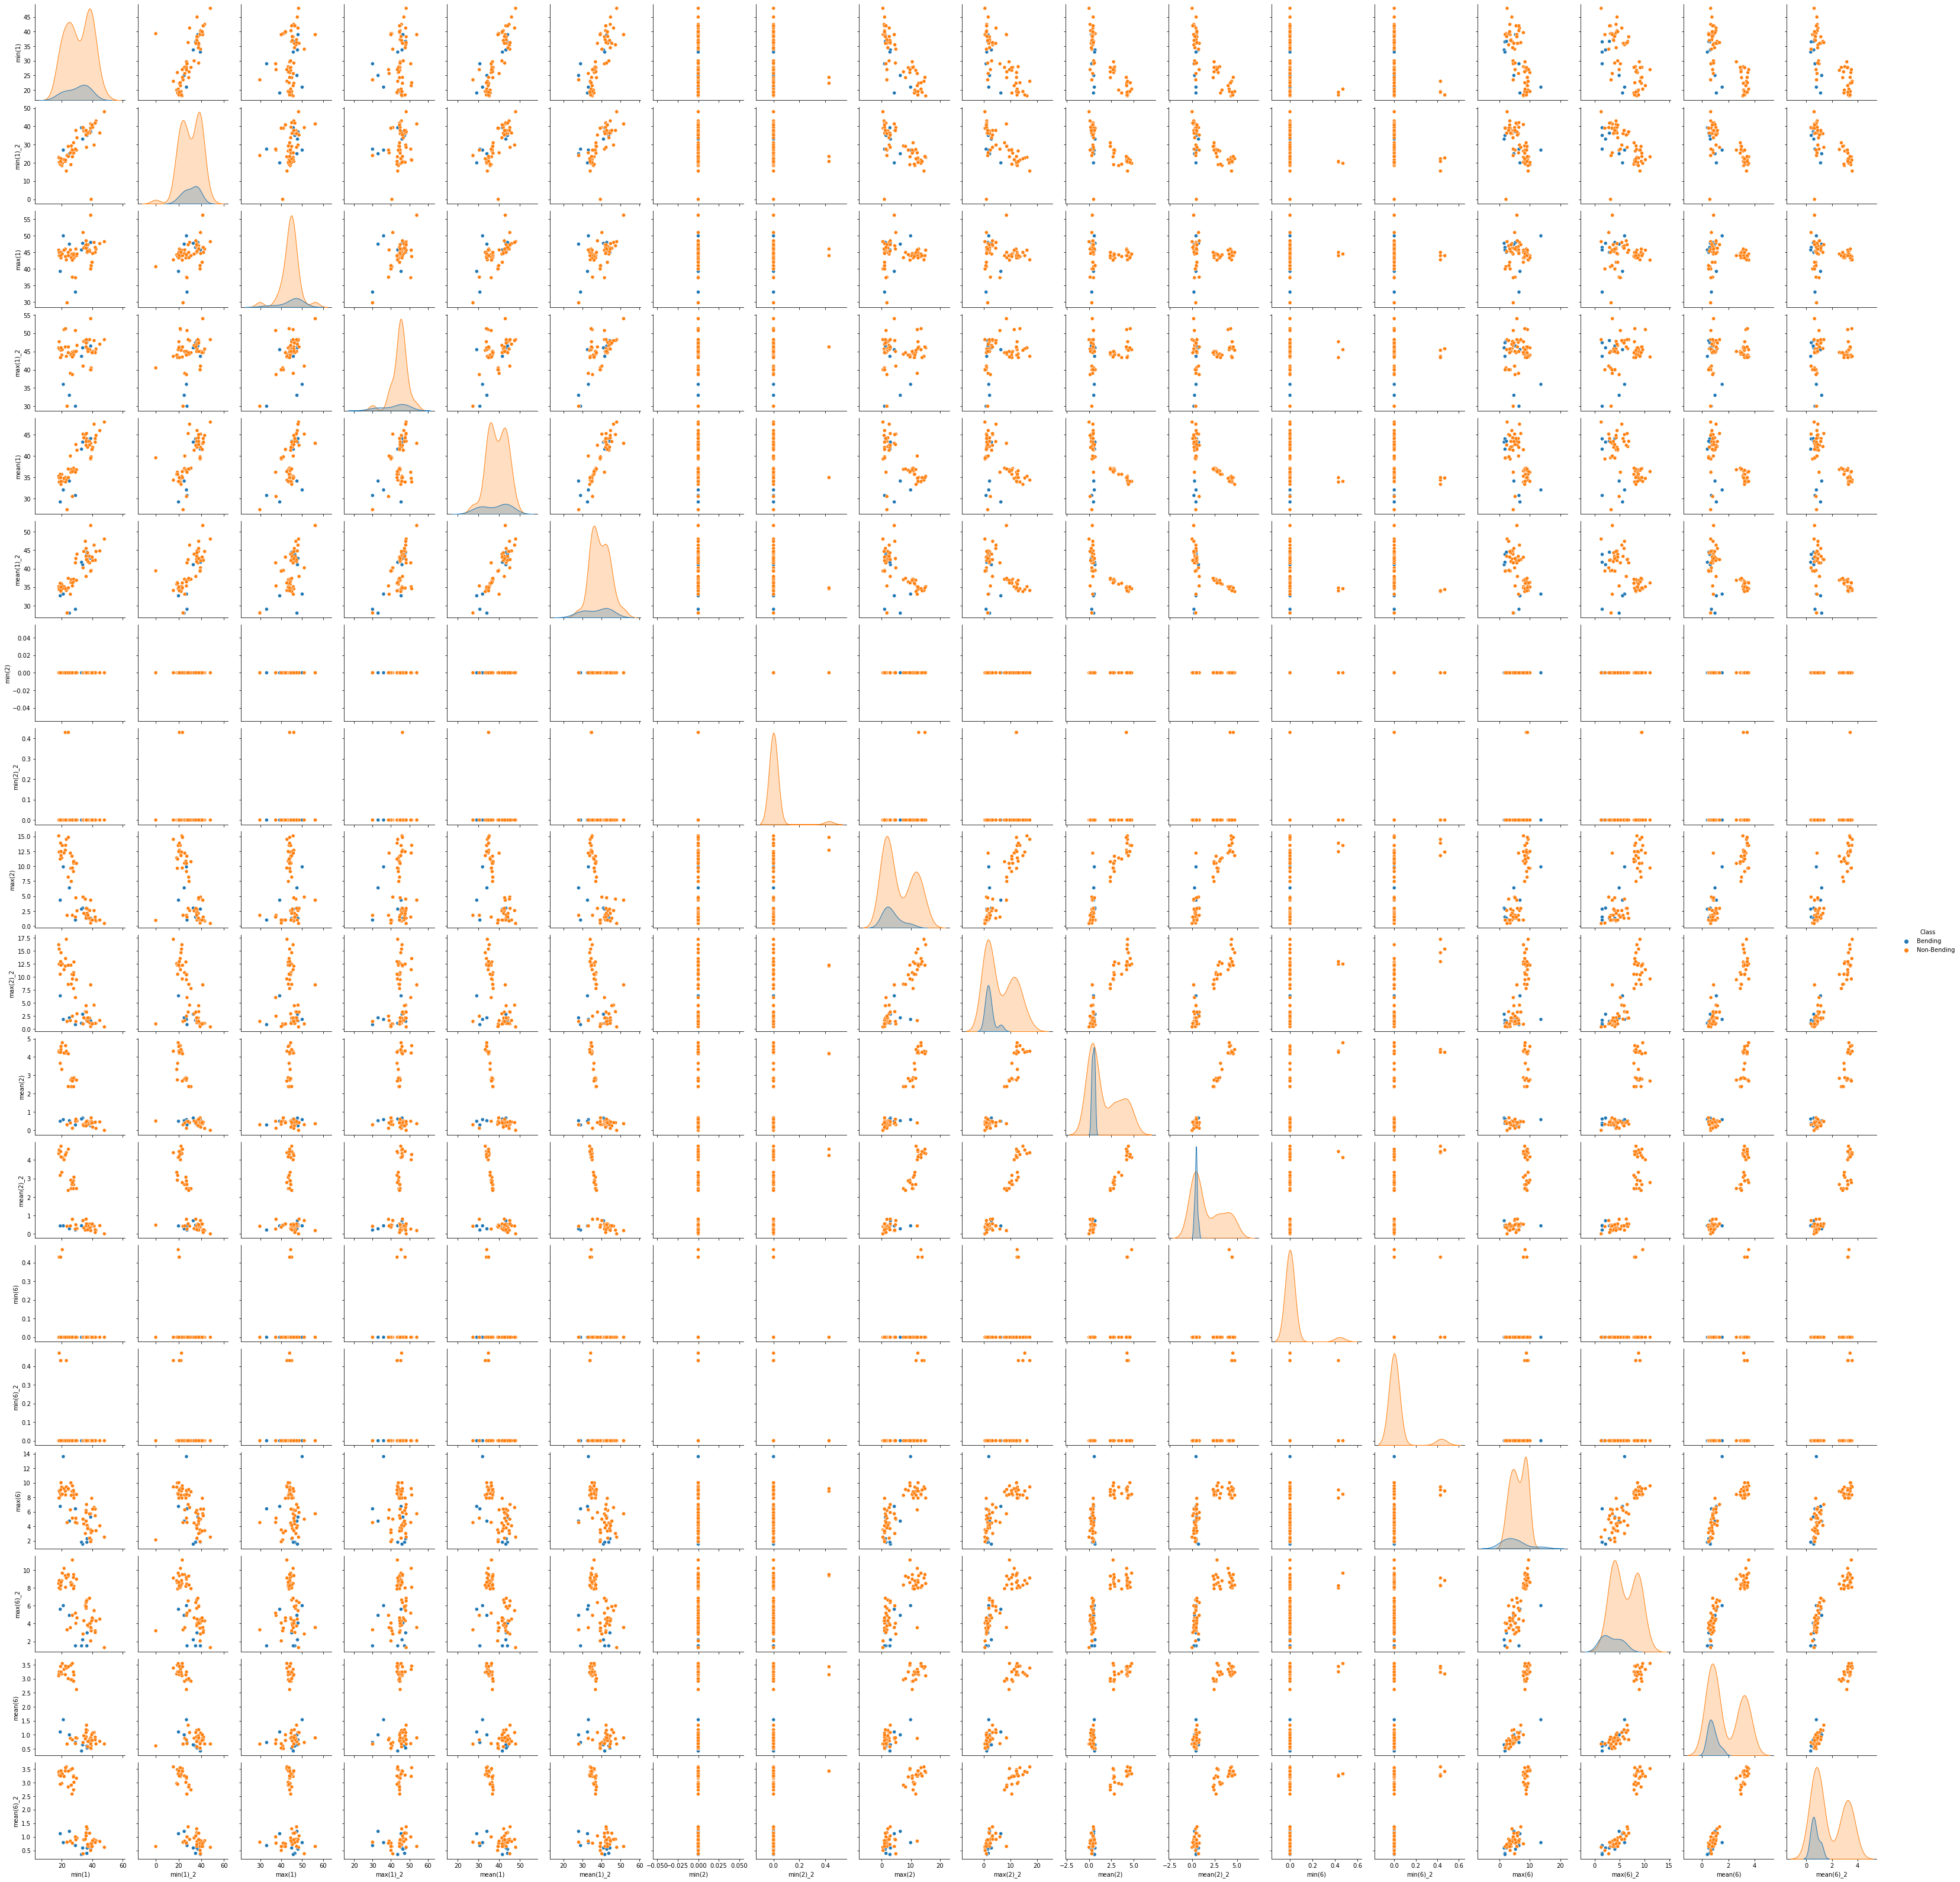

In [49]:
sns.pairplot(d33_1, hue = "Class")

### The scatter plot of features I specified in 1(c)iv, 12 time series for each training instance of the time series 1,2, and 6 is shown as above.Do you see any considerable difference in the results with those of 2(a)i?

###  No, theres no different, it seems that scatter plot has same result from the previous question but with extra more 9 columns and rows that actually the same as of the previous answer.



# iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features.


# Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R.

# Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7

# Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation.

# Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.


In [2]:
path = os.getcwd()
csv_files = glob.glob(os.path.join('../data', "**/*.csv"))

In [4]:
df1_test = {}
df1_train = {}

In [5]:
for f in csv_files:
    if f.endswith('dataset1.csv') or f.endswith('dataset2.csv') or f.endswith('dataset3.csv') \
        and f.endswith('bending1/dataset3.csv') == False and f.endswith('bending2/dataset3.csv') == False:
        df1 = pd.read_csv(f, skiprows = 4)
        split = f.split("/",2)
        string = split[2]
        df1_test[string] = df1
    else:
        df1 = pd.read_csv(f, skiprows = 4)
        split = f.split("/",2)
        string = split[2]
        df1_train[string] = df1        

In [9]:
split[2]

'cycling/dataset9.csv'

In [6]:
df1_test

{'bending1/dataset1.csv':      # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      39.25       0.43      22.75       0.43      33.75   
 1                250      39.25       0.43      23.00       0.00      33.00   
 2                500      39.25       0.43      23.25       0.43      33.00   
 3                750      39.50       0.50      23.00       0.71      33.00   
 4               1000      39.50       0.50      24.00       0.00      33.00   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      43.33       0.47      25.00       0.00      30.00   
 476           119000      43.50       0.50      25.50       0.50      30.00   
 477           119250      43.50       0.50      24.75       0.43      30.00   
 478           119500      43.50       0.50      24.33       0.47      30.00   
 479           119750      43.50       0.50      24.25       0.43      30.00   
 
      var_rss

In [53]:
min_list = []
max_list = []
mean_list = []

In [54]:
# make a list for K in range 1 to 20
p = list(range(1,21, 1))
p

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [55]:
min_list1 = {}
max_list1 = {}
mean_list1 = {}
class_list1 = {}
feature2 = {}
l_list = []
n_feature = []
accuracy = []
df5 = {}
df3 = pd.DataFrame()
df11 = {}
for q, g in enumerate(p):
    
    df2 = pd.DataFrame()
    for i in range(0,6*g,1):
        min_list1['min'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        max_list1['max'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        mean_list1['mean'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        class_list1['Class'] = []
        F_list = [min_list1, max_list1, mean_list1]
    for f in df1_train:
        split_1 = f.split("/",1)
        class_list1['Class'].append(split_1[0])
        for r in range(0,6*g,1):
            c = np.array_split(df1_train[f].iloc[:,r%6+1], g)
            min_list1['min'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].min())
            max_list1['max'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].max())
            mean_list1['mean'+ str(r%6+1) + "_" + str(int(r/6+1))].append(statistics.mean(c[int(r/6-1)]))

    for z in range(0,6*g,1):
        for j in F_list:
            df2[list(j)[z]] = j[list(j)[z]]
            
    df2['Class'] = class_list1['Class']
    df12 = df2.copy()
    df11[g] = df12 #uses for c(i)
    
    df2.loc[df2.Class == "bending1", "Class"] = "Bending"
    df2.loc[df2.Class == "bending2", "Class"] = "Bending"
    df2.loc[df2["Class"] != "Bending", "Class"] = "Non-Bending"
    df5[g] = df2
    
    model = LogisticRegression(max_iter = 10000, C = float('inf'))
    RFE_CV = RFECV(model, cv = StratifiedKFold(5), scoring = 'accuracy')
    RFE_CV = RFE_CV.fit(df2.drop(columns = "Class"),df2["Class"])
    
    
    feature = []
    for n1, z1 in enumerate(df2.drop(columns = "Class").columns):
        feature1 = RFE_CV.support_
        if feature1[n1] == True:
            feature.append(z1)
            
    feature2["("+ str(g) +")"] = feature

    
    l_list.append(g)
    n_feature.append(RFE_CV.n_features_)
    accuracy.append(max(RFE_CV.cv_results_['mean_test_score']))

In [56]:
df3 = df3.assign(l = l_list, N_features = n_feature, Feature = list(feature2.values()), Accuracy = accuracy)

In [57]:
df3

,l,N_features,Feature,Accuracy
0,1,10,"[min1_1, mean1_1, max2_1, mean2_1, mean3_1, mi...",0.985714
1,2,11,"[max1_1, mean1_1, max2_1, min5_1, max5_1, mean...",0.985714
2,3,27,"[max1_1, mean1_1, max2_1, min3_1, mean3_1, max...",1.000000
3,4,32,"[max2_1, min3_1, max3_1, mean3_1, min5_1, max5...",0.971429
4,5,1,[mean5_2],0.957143
5,6,1,[mean5_2],0.957143
6,7,3,"[mean5_1, mean5_2, min5_3]",0.971429
7,8,5,"[max1_3, max5_3, mean5_4, max1_7, min5_8]",0.957143
8,9,4,"[mean5_2, mean5_3, min5_4, max1_6]",0.957143
9,10,5,"[min5_3, mean5_3, min5_4, max1_9, min5_10]",0.971429


### The above dataframe shown above shows the best feature when breaking the data from 1, 2, ..., 20. As well as the accuracy rate of each model.
### This problem is a right way because we did CV during feature selection

# iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.


In [58]:
df4 = pd.DataFrame(df3.iloc[2,])
df4_1 = pd.DataFrame(df3.iloc[18,])


In [59]:
df4 = pd.concat([df4.T, df4_1.T])


In [60]:
df4

,l,N_features,Feature,Accuracy
2,3,27,"[max1_1, mean1_1, max2_1, min3_1, mean3_1, max...",1.0
18,19,15,"[max5_2, min5_3, mean5_3, max1_4, min5_4, max5...",1.0


In [61]:
df6 = df5[3][feature2['(3)']]


In [62]:
df6 = pd.concat([df6, df5[3].loc[:,"Class"]], axis = 1)
df6.Class.replace(('Bending', 'Non-Bending'), (1 , 0), inplace = True)


In [63]:
train_x = df6.drop(columns = "Class")
train_y = df6["Class"]

In [64]:
model.fit(train_x, train_y)

LogisticRegression(C=inf, max_iter=10000)

In [65]:
y_pred = model.predict(train_x)
y_true = train_y

In [66]:
df_confusion = pd.DataFrame(confusion_matrix(y_pred, y_true))
df_confusion = df_confusion.rename_axis(index = 'True', columns = 'Predicted')
df_confusion

Predicted,0,1
True,,
0,60,0
1,0,9


### the confusion matrix is shown as above


In [67]:
df6 = df5[3][feature2['(3)']]

In [68]:
ytrain = df5[3].loc[:,"Class"]

In [69]:
df6 = pd.concat([df6, df5[3].loc[:,"Class"]], axis = 1)

In [70]:
df6.Class.replace(('Bending', 'Non-Bending'), (1 , 0), inplace = True)

In [71]:
##log = sm.Logit(train_y, train_x).fit(method = "bfgs", maxiter = 10000)
#log.summary()

### I have tried every methods that I possibly can to try to get the P-value. Also, in this problem the classes are well-seperated/linear separable, calculating the p-value is not reliable, so then we should perform discriminant analysis......

In [72]:
y_score = model.decision_function(train_x)

In [73]:
fpr, tpr, thresholds = roc_curve(train_y, y_score)
auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC curve')

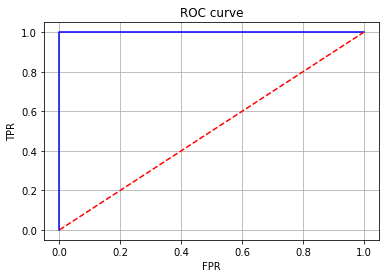

In [74]:
plt.plot(fpr, tpr, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.title("ROC curve")

### The graph shown above is ROC


In [75]:
auc


1.0

### My auc value is 1

# v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.


In [76]:
min_list1 = {}
max_list1 = {}
mean_list1 = {}
class_list1 = {}
l_list = []
n_feature = []
accuracy = []
df7 = {}
df3 = pd.DataFrame()
df15 = {}

for q, g in enumerate(p):
    df2 = pd.DataFrame()
    for i in range(0,6*g,1):
        min_list1['min'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        max_list1['max'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        mean_list1['mean'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
        class_list1['Class'] = []
        F_list = [min_list1, max_list1, mean_list1]
    for f in df1_test:
        split_1 = f.split("/",1)
        class_list1['Class'].append(split_1[0])
        for r in range(0,6*g,1):
            c = np.array_split(df1_test[f].iloc[:,r%6+1], g)
            min_list1['min'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].min())
            max_list1['max'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].max())
            mean_list1['mean'+ str(r%6+1) + "_" + str(int(r/6+1))].append(statistics.mean(c[int(r/6-1)]))

    for z in range(0,6*g,1):
        for j in F_list:
            df2[list(j)[z]] = j[list(j)[z]]
            
    df2['Class'] = class_list1['Class']
    df16 = df2.copy()
    df15[g] = df16
    
    df2.loc[df2.Class == "bending1", "Class"] = "Bending"
    df2.loc[df2.Class == "bending2", "Class"] = "Bending"
    df2.loc[df2["Class"] != "Bending", "Class"] = "Non-Bending"
    df7[g] = df2
#    model = LogisticRegression(max_iter = 10000, C = float('inf'))
#    RFE_CV = RFECV(model, cv = StratifiedKFold(5), scoring = 'accuracy')
#    RFE_CV = RFE_CV.fit(df2.drop(columns = "Class"),df2["Class"])
#    feature = []
#    for n1, z1 in enumerate(df2.drop(columns = "Class").columns):
#        feature1 = RFE_CV.support_
#        if feature1[n1] == True:
#            feature.append(z1)
            
#    feature2["("+ str(g) +")"] = feature

    
#    l_list.append(g)
#    n_feature.append(RFE_CV.n_features_)
#    accuracy.append(max(RFE_CV.cv_results_['mean_test_score']))

In [77]:
df20 = df7[3][feature2['(3)']]
df20 = pd.concat([df20, df7[3].loc[:,"Class"]], axis = 1)
df20.Class.replace(('Bending', 'Non-Bending'), (1 , 0), inplace = True)


In [78]:
train_x1 = df20.drop(columns = "Class")
train_y1 = df20["Class"]

In [79]:
y_pred1 = model.predict(train_x1)
y_true1 = train_y1

In [80]:
accuracy_score(y_true1, y_pred1)

1.0

### The accuracy is the same on the test set with the cross-validation accuracy I obtained previously.


# vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

# Yes

# vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [81]:
df_confusion

Predicted,0,1
True,,
0,60,0
1,0,9


# From the confusion matrix, we can tell it it is imbalanced

In [82]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [83]:
# summarize class distribution
print("Before oversampling: ",Counter(train_y))

# define oversampling strategy
smote = SMOTE()

# fit and apply the transform
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)

# summarize class distribution
print("After oversampling: ",Counter(train_y_smote))

#PART 2
# import SVM libraries 


model = LogisticRegression(max_iter=10000,C=float('inf'))
clf_smote = model.fit(train_x_smote, train_y_smote)
pred_smote = clf_smote.predict(train_x_smote)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(train_y_smote, pred_smote))
print(clf_smote.intercept_)
print(clf_smote.coef_)

Before oversampling:  Counter({0: 60, 1: 9})
After oversampling:  Counter({1: 60, 0: 60})
ROC AUC score for oversampled SMOTE data:  1.0
[-0.0130261]
[[-0.43051495 -0.33102833 -0.52654961 -0.19413535 -0.35226374 -0.15119905
   0.73587201  1.04252194  0.75616737 -0.19915964 -0.21955899 -0.42281027
  -0.52654961 -0.35226374 -0.15119905  0.73587201  1.04252194  0.75616737
  -0.19915964 -0.07756082 -0.40778496 -0.45709969 -0.30618049  0.47328015
   0.30547622  0.18727259 -0.31699998]]


In [84]:
y_pred2 = model.predict(train_x_smote)
y_true2 = train_y_smote

In [85]:
from sklearn.metrics import roc_curve, auc

In [86]:
y_score1 = model.decision_function(train_x_smote)
fpr1, tpr1, thresholds1 = roc_curve(train_y_smote, y_score1)
auc1 = auc(fpr1, tpr1)

Text(0, 0.5, 'TPR1')

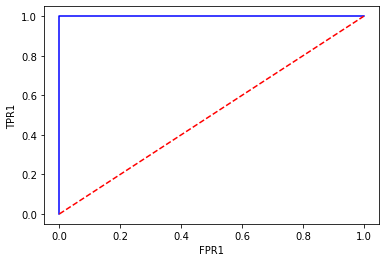

In [87]:
plt.plot(fpr1, tpr1, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.xlabel("FPR1")
plt.ylabel("TPR1")

# The ROC graph is shown as above

In [136]:
print('AUC: '+ str(auc1))
print('----------------------------')

AUC: 1.0
----------------------------


### The AUC is 1

In [89]:
df_confusion = pd.DataFrame(confusion_matrix(y_pred2, y_true2))
df_confusion = df_confusion.rename_axis(index = 'True', columns = 'Predicted')
df_confusion

Predicted,0,1
True,,
0,60,0
1,0,60


### The confusion matrix is shown as above

# (b) Binary Classification Using L1-penalized logistic regression

# i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.


In [90]:
from sklearn.preprocessing import MinMaxScaler


In [91]:
scaler = MinMaxScaler()


In [92]:
df9 = df5.copy()


In [93]:
#Scale/Regularization
for i in (p):
    scaler.fit(df9[i].drop(columns = "Class"))
    df9[i] = scaler.transform(df9[i].drop(columns = "Class"))

In [108]:
min_list1 = {}
max_list1 = {}
mean_list1 = {}
class_list1 = {}
l_list = []
c_value = []
cs_value = []
df10 = {}
df3 = pd.DataFrame()
feature3 = {}
n_feature = []
Accuracy_Score = []

for q, g in enumerate(p):
#    for i in range(0,6*g,1):
#        min_list1['min'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
#        max_list1['max'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
#        mean_list1['mean'+ str(i%6+1) + "_" + str(int(i/6+1))] = []
#        class_list1['Class'] = []
#        F_list = [min_list1, max_list1, mean_list1]
#    for f in df1_train:
#        split_1 = f.split("/",1)a
#        class_list1['Class'].append(split_1[0])
#        for r in range(0,6*g,1):
#            c = np.array_split(df1_train[f].iloc[:,r%6+1], g)
#            min_list1['min'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].min())
#            max_list1['max'+ str(r%6+1) + "_" + str(int(r/6+1))].append(c[int(r/6-1)].max())
#            mean_list1['mean'+ str(r%6+1) + "_" + str(int(r/6+1))].append(statistics.mean(c[int(r/6-1)]))
#
#    for z in range(0,6*g,1):
#        for j in F_list:
#            df2[list(j)[z]] = j[list(j)[z]]
#            
#    df2['Class'] = class_list1['Class']
#    df2.loc[df2.Class == "bending1", "Class"] = "Bending"
#    df2.loc[df2.Class == "bending2", "Class"] = "Bending"
#    df2.loc[df2["Class"] != "Bending", "Class"] = "Non-Bending"
#    df7[g] = df2
    
    df5[g].Class.replace(('Bending', 'Non-Bending'), (1 , 0), inplace = True)
    model = LogisticRegressionCV(Cs=100, cv = StratifiedKFold(5), solver = 'liblinear', 
                                 max_iter = 10000, penalty = 'l1')
    model = model.fit(df9[g], df5[g].Class)
    
    feature4 = []
    
    coef = model.coef_[0]
    b = 0
    for x, k in enumerate(coef):
        if coef[x] != 0:
            feature4.append(df5[g].columns[x])
            b += 1
        feature3["(" +str(g)+ ")"] = feature4

    
    l_list.append(g)
    c_value.append(model.C_)
    n_feature.append(b)
    Accuracy_Score.append(model.scores_[1].mean(axis=0).max())

#    RFE_CV = RFECV(model, cv = StratifiedKFold(5), scoring = 'accuracy')
#    RFE_CV = RFE_CV.fit(df2.drop(columns = "Class"),df2["Class"])
#    feature = []
#    for n1, z1 in enumerate(df2.drop(columns = "Class").columns):
#        feature1 = RFE_CV.support_
#        if feature1[n1] == True:
#            feature.append(z1)
            
#    feature2["("+ str(g) +")"] = feature

    
#    l_list.append(g)
#    n_feature.append(RFE_CV.n_features_)
#    accuracy.append(max(RFE_CV.cv_results_['mean_test_score']))


In [109]:
df10 = pd.DataFrame()

In [110]:
df10 = df10.assign(l = l_list, c = c_value, N_feature = n_feature,
                   feature = list(feature3.values()), Accuracy_Score = Accuracy_Score)


In [111]:
df10

,l,c,N_feature,feature,Accuracy_Score
0,1,[613.5907273413176],11,"[min1_1, max1_1, mean1_1, max2_1, min3_1, mean...",0.971429
1,2,[613.5907273413176],15,"[min1_1, max1_1, mean1_1, max2_1, mean3_1, mea...",0.957143
2,3,[4750.810162102803],35,"[min1_1, max1_1, mean1_1, max2_1, max3_1, mean...",0.956044
3,4,[114.9756995397738],21,"[min1_1, max2_1, min3_1, max3_1, max4_1, max5_...",0.957143
4,5,[200.923300256505],19,"[min1_1, min3_1, max5_1, mean5_1, min1_2, mean...",0.941758
5,6,[1.0974987654930568],7,"[mean6_1, mean1_2, min5_2, mean6_2, max5_3, ma...",0.927473
6,7,[4.862601580065354],13,"[max5_1, min1_2, min5_2, max5_2, min5_3, max5_...",0.942857
7,8,[25.950242113997373],18,"[max5_1, min1_2, mean1_2, max5_2, max2_3, min3...",0.928571
8,9,[4.037017258596558],12,"[min1_2, mean1_3, max5_3, max5_4, min1_6, max1...",0.942857
9,10,[95.45484566618347],31,"[min1_1, min3_1, max5_1, min1_2, mean1_2, min3...",0.928571


### From the above dataframe, we can tell that when using the orignial 6 feature has the highest accuracy score thats about 0.971429


# ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?


### Depends on the accuracy score, RFECV performs better because it has 100% accuracy, whereas I only got 97% when using L-1 penalized logstic regression. On the other hand, L-1 penalized logstic regreesion is easier to implement since it requires less features.


# (c) Multi-class Classification (The Realistic Case)


# i. Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.


In [112]:
df13 = df11.copy()

In [113]:
for q, g in enumerate(p):
    df13[g] = df13[g].drop(columns = "Class")


In [114]:
l_list = []
c_value1 = []
feature6 = {}
n_feature = []
Accuracy_Score = []
test_error = []

for q, g in enumerate(p):
    
    df11[g].Class.replace(('bending1', 'bending2', 'cycling', 'sitting', 'walking', 'standing', 'lying')
                          , (1,2,3,4,5,6,7), inplace = True)
    
    model = LogisticRegressionCV(Cs=100, cv = StratifiedKFold(4), solver = 'saga', scoring = 'accuracy'
                                 ,max_iter = 100000, multi_class = 'multinomial', penalty = 'l1')
    
    
#    scaler.fit(df13[g].drop(columns = "Class"))
#    df13[g] = scaler.transform(df13[i].drop(columns = "Class"))
    
    df14 = df11[g].drop(columns = "Class")
    scaler.fit(df14)
    df14_T = pd.DataFrame(scaler.transform(df14), columns = df14.columns)
    
    y = df11[g].Class
    model1 = model.fit(scaler.transform(df14), y)

    feature5 = []

    coef = model1.coef_[0]    
    b = 0
    for x, k in enumerate(coef):
        if coef[x] != 0:
            feature5.append(df13[g].columns[x])
            b += 1
        feature6["(" +str(g)+ ")"] = feature5
    

    
    l_list.append(g)
    n_feature.append(b)
    c_value1.append(model1.C_[0])
    Accuracy_Score.append(model1.scores_[1].mean(axis=0).max())
    test_error.append(1 - model1.scores_[1].mean(axis=0).max())


In [115]:
df14 = pd.DataFrame()

In [116]:
df14 = df14.assign(l = l_list, c = c_value1, Accuracy_Score = Accuracy_Score, Test_Error = test_error)


In [117]:
df14

,l,c,Accuracy_Score,Test_Error
0,1,3.351603,0.812908,0.187092
1,2,8.497534,0.725490,0.274510
2,3,166.810054,0.754902,0.245098
3,4,95.454846,0.783497,0.216503
4,5,7.054802,0.767974,0.232026
5,6,2.310130,0.741013,0.258987
6,7,0.911163,0.725490,0.274510
7,8,10.235310,0.797386,0.202614
8,9,0.756463,0.725490,0.274510
9,10,0.911163,0.783497,0.216503


### From the dataframe shown above, using the original data (6 time series) has the highest accuracy score, which mean going to give me the smallest test error


In [118]:
df15[1].Class.replace(('bending1', 'bending2', 'cycling', 'sitting', 'walking', 'standing', 'lying')
                          , (1,2,3,4,5,6,7), inplace = True)

In [119]:
y_true4 = []

x_1 = df11[1].drop(columns = "Class")
x_2 = df7[1].drop(columns = "Class")
y = df11[1].Class
y_2 = df15[1].Class

model2 = model.fit(x_1, y)

y_pred4 = model2.predict(x_2)
y_score5 = model2.decision_function(x_2)

y_true4 = y_2

In [120]:
Class1 = [1,2,3,4,5,6,7]
Class = ['bending1', 'bending2', 'cycling', 'sitting', 'walking', 'standing', 'lying']
df_confusion1 = pd.DataFrame(confusion_matrix(y_pred4, y_true4, labels = Class1), columns = Class, index = Class)
df_confusion1

,bending1,bending2,cycling,sitting,walking,standing,lying
bending1,2,0,0,0,0,0,0
bending2,0,1,0,0,0,0,0
cycling,0,1,2,0,0,0,0
sitting,0,0,0,3,0,0,0
walking,0,0,1,0,3,0,0
standing,0,0,0,0,0,2,0
lying,0,0,0,0,0,1,3


In [121]:
y_2 = label_binarize(y_2, classes = Class1)

In [122]:
fpr2 = {}
tpr2 = {}
thresholds2 = {}
auc2 = {}
for i in range(y_2.shape[1]):
    fpr2[i+1], tpr2[i+1], thresholds2[i+1] = roc_curve(y_2[:,i], y_score5[:,i])
    auc2[i+1] = auc(fpr2[i+1], tpr2[i+1])

In [123]:
color = ['red', 'darkturquoise', 'blueviolet', 'mediumblue', 'orange', 'sienna', 'darkgreen']

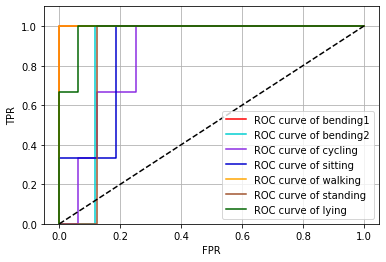

In [124]:
for i, k in enumerate(color):
    plt.plot(fpr2[i+1], tpr2[i+1], color = color[i],
             label = "ROC curve of "+Class[i])
    
plt.plot([0,1],[0,1], color = 'black', linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.ylim(0,1.1)
plt.grid()
plt.legend()

# The ROC graph is shown as above


# ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both gaussian and multinomial priors and compare the results.


In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [126]:
gnb = GaussianNB()
mul = MultinomialNB()

In [127]:
## Gaussian
x_1 = df11[1].drop(columns = "Class")
x_2 = df7[1].drop(columns = "Class")
y = df11[1].Class
y_2 = df15[1].Class

model2 = gnb.fit(x_1, y)
y_pred6 = model2.predict(x_2)

y_score6 = model2.predict_proba(x_2)

y_true6 = y_2

In [128]:
df_confusion2 = pd.DataFrame(confusion_matrix(y_pred6, y_true6, labels = Class1), columns = Class, index = Class)
df_confusion2

,bending1,bending2,cycling,sitting,walking,standing,lying
bending1,2,0,0,0,0,0,0
bending2,0,2,0,0,0,0,0
cycling,0,0,3,0,0,0,0
sitting,0,0,0,3,0,0,1
walking,0,0,0,0,3,0,0
standing,0,0,0,0,0,3,0
lying,0,0,0,0,0,0,2


### The confusion matrix for gaussian is shown as above

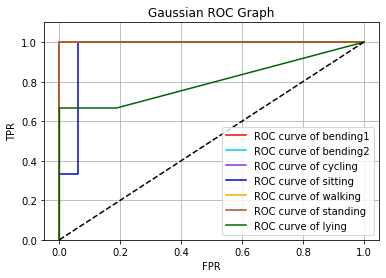

In [129]:
y_2 = label_binarize(y_2, classes = Class1)

fpr3 = {}
tpr3 = {}
thresholds3 = {}
auc3 = {}
for i in range(y_2.shape[1]):
    fpr3[i+1], tpr3[i+1], thresholds3[i+1] = roc_curve(y_2[:,i], y_score6[:,i])
    auc3[i+1] = auc(fpr3[i+1], tpr3[i+1])
    plt.plot()

for i, k in enumerate(color):
    plt.plot(fpr3[i+1], tpr3[i+1], color = color[i],
             label = "ROC curve of "+Class[i])
    
plt.plot([0,1],[0,1], color = 'black', linestyle = "--")
plt.title("Gaussian ROC Graph")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.ylim(0,1.1)
plt.grid()
plt.legend()

# The Gaussian ROC graph is shown as above


In [130]:
test_error1 = 1 - accuracy_score(y_true6, y_pred6)


In [131]:
print('The test error for Gaussian is ' + str(test_error1))


The test error for Gaussian is 0.052631578947368474


### The test error for Gaussian is about 0.052631578947368474


In [132]:
## multinomial 
x_1 = df11[1].drop(columns = "Class")
x_2 = df7[1].drop(columns = "Class")
y = df11[1].Class
y_2 = df15[1].Class

model2 = mul.fit(x_1, y)
y_pred7 = model2.predict(x_2)
y_score7 = model2.predict_proba(x_2)
y_true7 = y_2

In [133]:
df_confusion3 = pd.DataFrame(confusion_matrix(y_pred7, y_true7, labels = Class1), columns = Class, index = Class)
df_confusion3

,bending1,bending2,cycling,sitting,walking,standing,lying
bending1,2,0,0,0,0,0,0
bending2,0,1,0,0,0,0,0
cycling,0,1,2,0,0,0,0
sitting,0,0,0,2,0,1,0
walking,0,0,1,0,3,0,0
standing,0,0,0,1,0,1,0
lying,0,0,0,0,0,1,3


### The confusion matrix for multinomial is shown as above


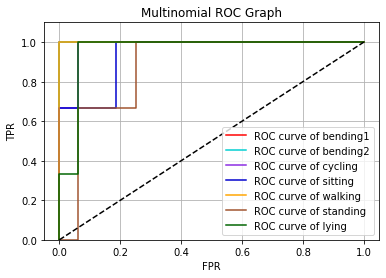

In [134]:
y_2 = label_binarize(y_2, classes = Class1)
fpr4 = {}
tpr4 = {}
thresholds4 = {}
auc4 = {}
for i in range(y_2.shape[1]):
    fpr4[i+1], tpr4[i+1], thresholds4[i+1] = roc_curve(y_2[:,i], y_score7[:,i])
    auc4[i+1] = auc(fpr4[i+1], tpr4[i+1])
    plt.plot()

for i, k in enumerate(color):
    plt.plot(fpr4[i+1], tpr4[i+1], color = color[i],
             label = "ROC curve of "+Class[i])
    
plt.plot([0,1],[0,1], color = 'black', linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Multinomial ROC Graph")
plt.ylim(0,1.1)
plt.grid()
plt.legend()

### The Multinomial ROC Graph is shown as above

In [135]:
test_error2 = 1 - accuracy_score(y_true7, y_pred7)
print('The test error for multinomial is ' + str(test_error2))

The test error for multinomial is 0.26315789473684215


### The test error for multinomial is about 0.26315789473684215


# iii. Which method is better for multi-class classification in this problem?


### From both of my confusion matrix result, gaussian is better than multinomial based on their prediction performances. where gaussian was able do predcition with one misclassification, whereas multinomial misclassified 5 classes. Also, the test error for gaussian is lower than multinomial, so overall I would say gaussian is better method here.

# 3. ISLR 4.8.3


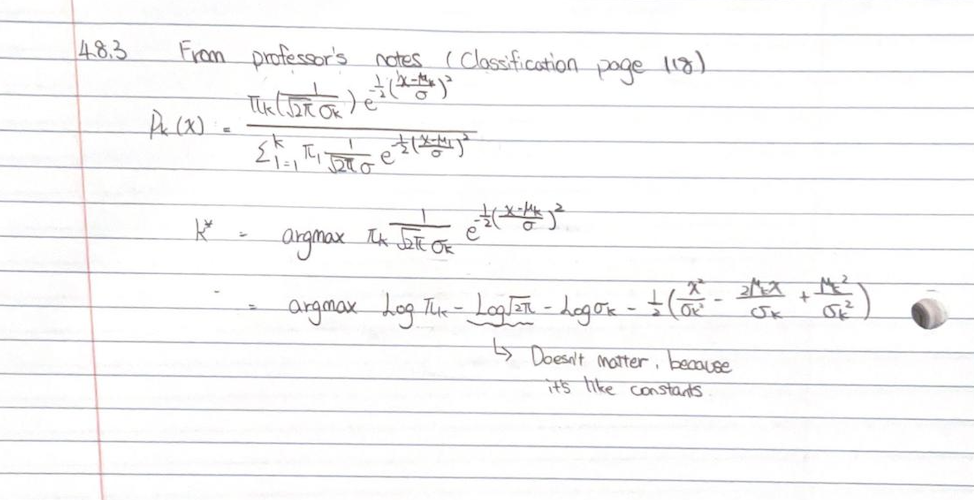

# 4. ISLR 4.8.7


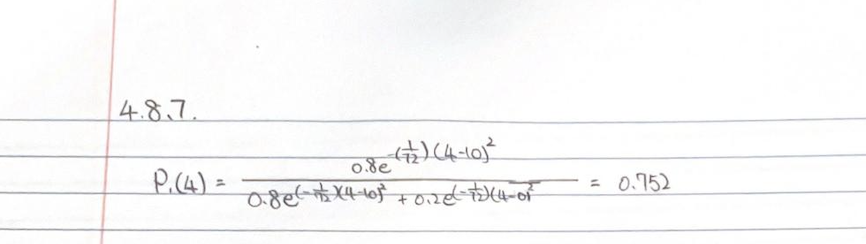